In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
## Import our dataset
df=pd.read_csv("/content/spam.csv", encoding='latin-1')
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2927,ham,Anything...,NaN,NaN,NaN
1895,ham,"Uh, heads up we don't have THAT much left",NaN,NaN,NaN
329,ham,I'm reading the text i just sent you. Its mean...,NaN,NaN,NaN
2459,ham,Nope. Meanwhile she talk say make i greet you.,NaN,NaN,NaN
517,spam,Your credits have been topped up for http://ww...,NaN,NaN,NaN
1478,ham,I think its far more than that but find out. C...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

**Data Cleaning**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
## Drop last 3 columns.
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Rename the columns.
df.rename(columns={"v1":"Target",'v2':'text'},inplace=True)
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
## Now do Labelencoder.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
# 0 for ham and 1 for spam
df["Target"]=encoder.fit_transform(df["Target"])
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
## Check for duplicate values.
df.duplicated().sum()

403

In [16]:
# Remove duplicate values.
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

**EDA**

In [19]:
# Check for imbalanced.
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

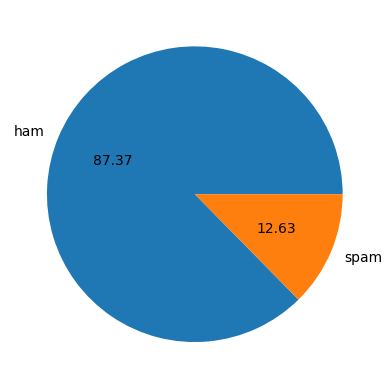

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
## Lets try to make new features.
df['num_char']=df['text'].apply(len)

<ipython-input-23-7516e8d551e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


In [28]:
#Number of words.
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
# Number of sentences.
df["num_sent"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))



In [30]:
df.head()

,Target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_char', ylabel='Count'>

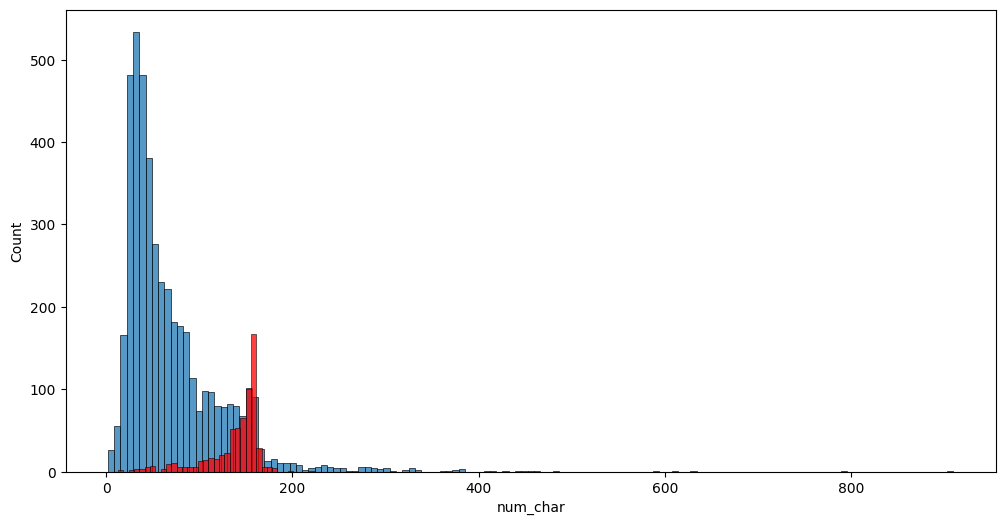

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_char'])
sns.histplot(df[df['Target'] == 1]['num_char'],color='red')

<ipython-input-33-49b359a398a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

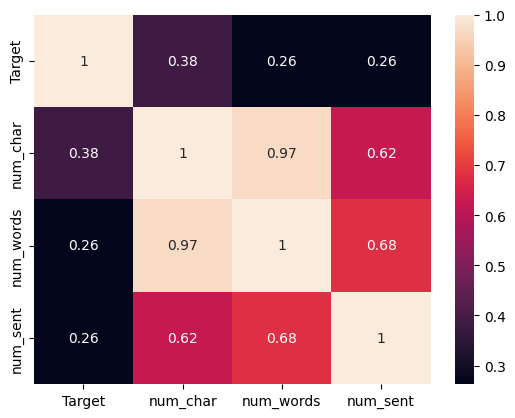

In [33]:
# heatmap
sns.heatmap(df.corr(),annot=True)

**Data Preprocessing
  1)*Lower case*
  2) Tokenization
  3) Removing special characters
  4) Removing stop words and punctuations
  5) Stemming**

In [56]:
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)


In [59]:
a="I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough toda"
transform_text(a)

'gon na home soon want talk stuff anymor tonight k cri enough toda'

In [60]:
df["transformed_text"]=df['text'].apply(transform_text)

In [61]:
df.head()

,Target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

In [65]:
# Using Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3500)

In [66]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 3500)

In [68]:
y=df["Target"].values

In [69]:
# Train test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2)

In [70]:
# Algorithim
# Use NB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[1205  155]
 [  37  154]]
0.49838187702265374


In [73]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.970341715022566
[[1360    0]
 [  46  145]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9819471308833011
[[1358    2]
 [  26  165]]
0.9880239520958084


In [75]:
# Try RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [76]:
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9696969696969697
[[1358    2]
 [  45  146]]
0.9864864864864865


**I choose mnb**

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))